In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,  roc_auc_score, confusion_matrix, classification_report, make_scorer, f1_score


In [2]:
emp_data =pd.read_csv(r"C:\Users\dell\Desktop\Jaya - Data Science\Project\employee attribution\Employee_Attrition.csv")
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
emp_data.shape

(1470, 35)

In [4]:
emp_data.select_dtypes(include='number').shape

(1470, 26)

In [5]:
emp_data.select_dtypes(exclude='number').shape

(1470, 9)

In [6]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
emp_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
emp_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
single_value_column=[col for col in emp_data.columns if emp_data[col].nunique()==1]
print(f"Columns with single value:{single_value_column}")

Columns with single value:['EmployeeCount', 'Over18', 'StandardHours']


In [10]:
drop_column = ['EmployeeNumber', 'EmployeeCount','StandardHours','Over18']
emp_data.drop(columns=drop_column, inplace=True)
emp_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [11]:
numerical_column = emp_data.select_dtypes(include='number')
numerical_column

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [12]:
categorical_column = emp_data.select_dtypes(exclude='number')
categorical_column

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


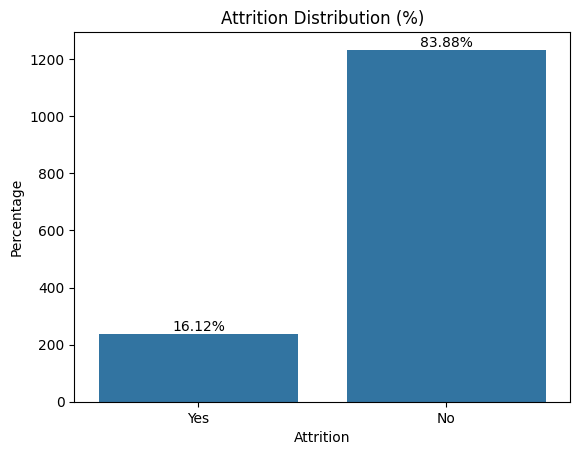

In [13]:
# Plot
ax = sns.countplot(x='Attrition', data=emp_data)
plt.title('Attrition Distribution (%)')

# Total count
total = len(emp_data)

# Add percentage labels
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y),
                ha='center', va='bottom')

plt.ylabel('Percentage')
plt.show()


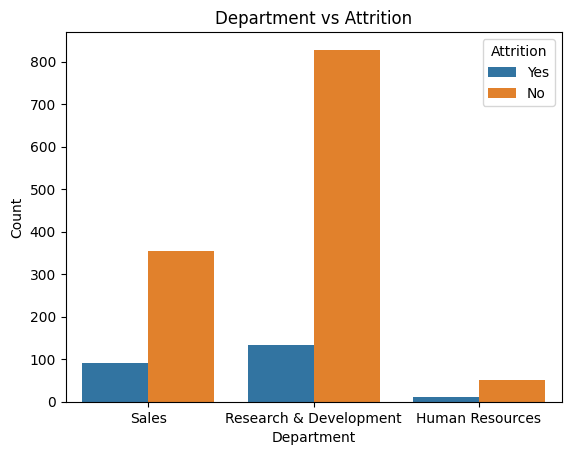

In [14]:
sns.countplot(x='Department', hue='Attrition', data=emp_data)
plt.title('Department vs Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

Sales has the highest attrition, Human Resources in the middle

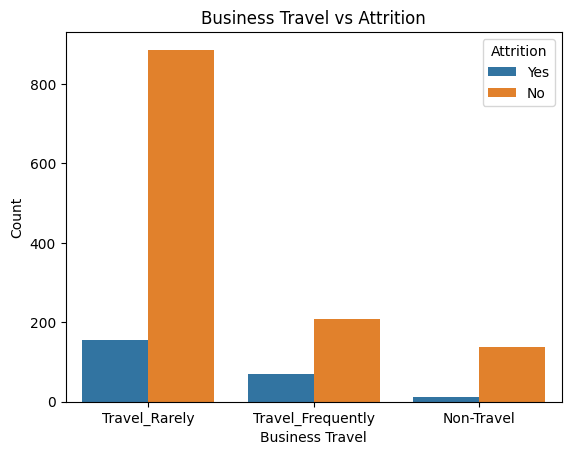

In [15]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=emp_data)
plt.title('Business Travel vs Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

frequent travelers are more likely to leave.

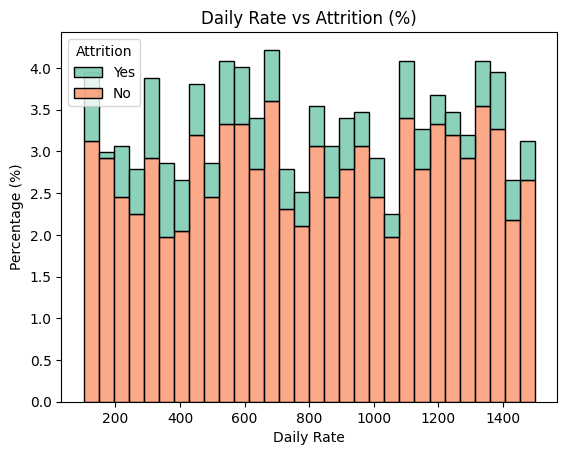

In [ ]:
sns.histplot(data=emp_data, x='DailyRate', hue='Attrition', stat='percent', multiple='stack', palette='Set2',bins=30)
plt.title('Daily Rate vs Attrition (%)')
plt.xlabel('Daily Rate')
plt.ylabel('Percentage (%)')
plt.show()

No clear pattern of attrition increasing or decreasing with daily rate — the percentage of leavers is roughly similar across different pay levels.

C:\Users\dell\AppData\Local\Temp\ipykernel_7752\4266540223.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Attrition')


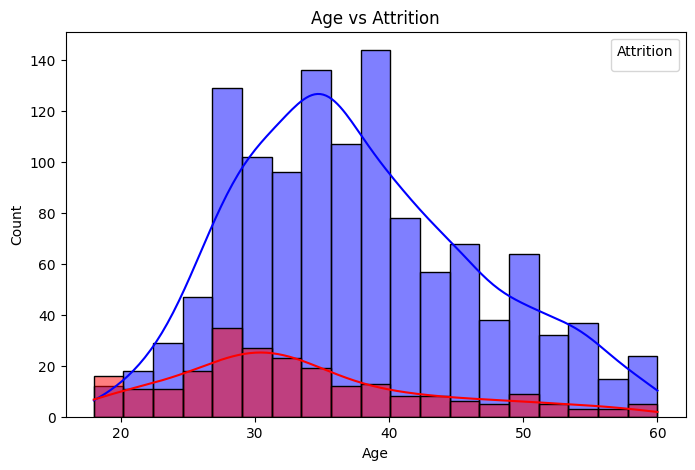

In [17]:
plt.figure(figsize=(8,5))

sns.histplot(data=emp_data, x='Age', hue='Attrition', kde=True, palette={'No': 'blue', 'Yes': 'red'}, element='bars', stat='count')

plt.title('Age vs Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

Younger employees are leaving more frequently, while mid-age and older employees have lower attrition.

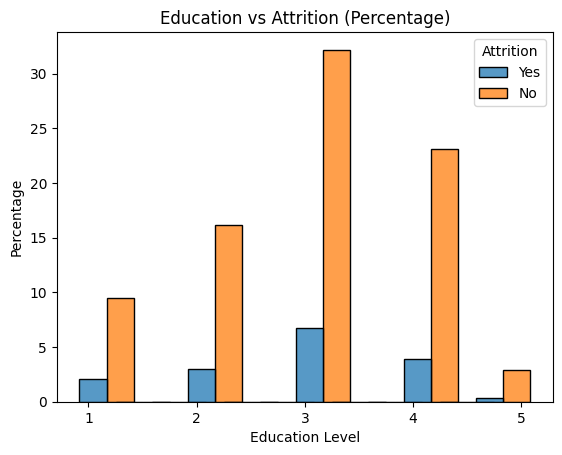

In [18]:
sns.histplot(data=emp_data, x='Education', hue='Attrition', stat='percent', multiple='dodge',shrink=1.5)
plt.title('Education vs Attrition (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Education Level')
plt.show()

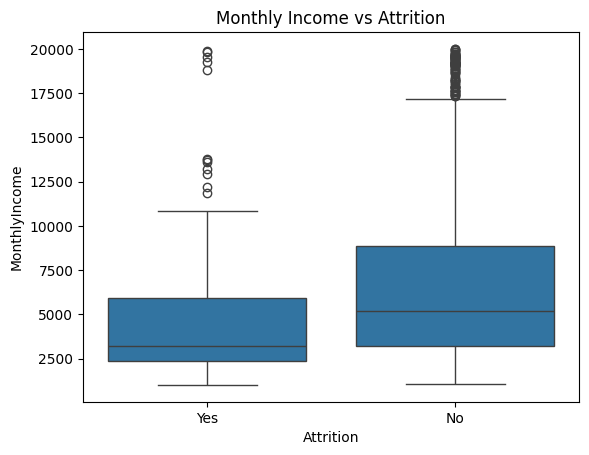

In [19]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=emp_data)
plt.title('Monthly Income vs Attrition')
plt.show()

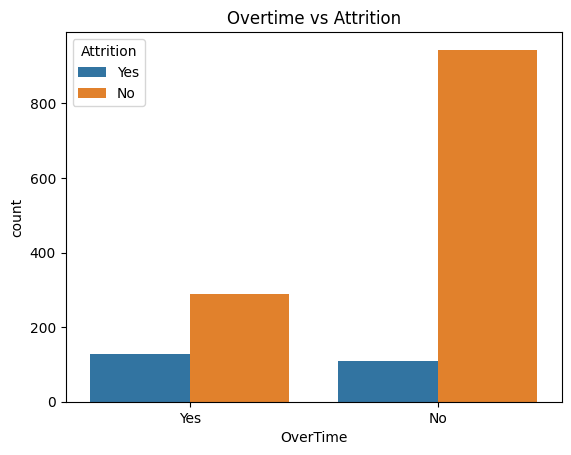

In [20]:
sns.countplot(x='OverTime', hue='Attrition', data=emp_data)
plt.title('Overtime vs Attrition')
plt.show()

Employees doing overtime have higher attrition

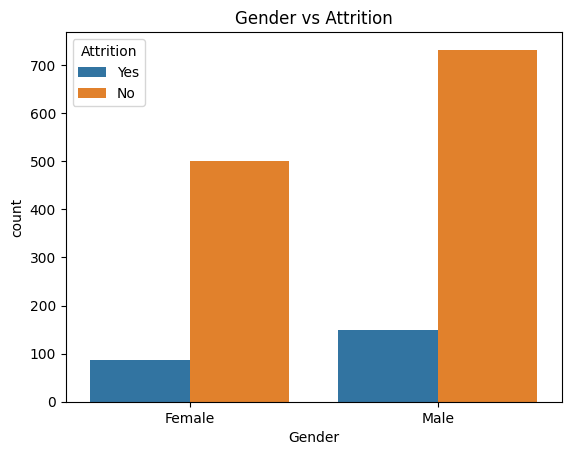

In [21]:
sns.countplot(x='Gender', hue='Attrition', data=emp_data)
plt.title('Gender vs Attrition')
plt.show()

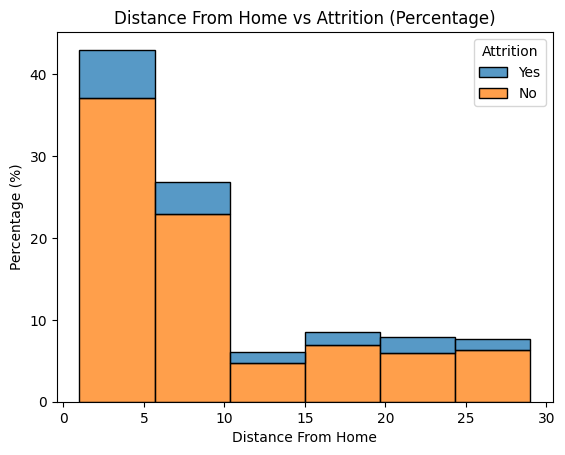

In [22]:
sns.histplot(data=emp_data, x='DistanceFromHome', hue='Attrition', multiple='stack', stat='percent', bins=6)

plt.xlabel('Distance From Home')
plt.ylabel('Percentage (%)')
plt.title('Distance From Home vs Attrition (Percentage)')
plt.show()

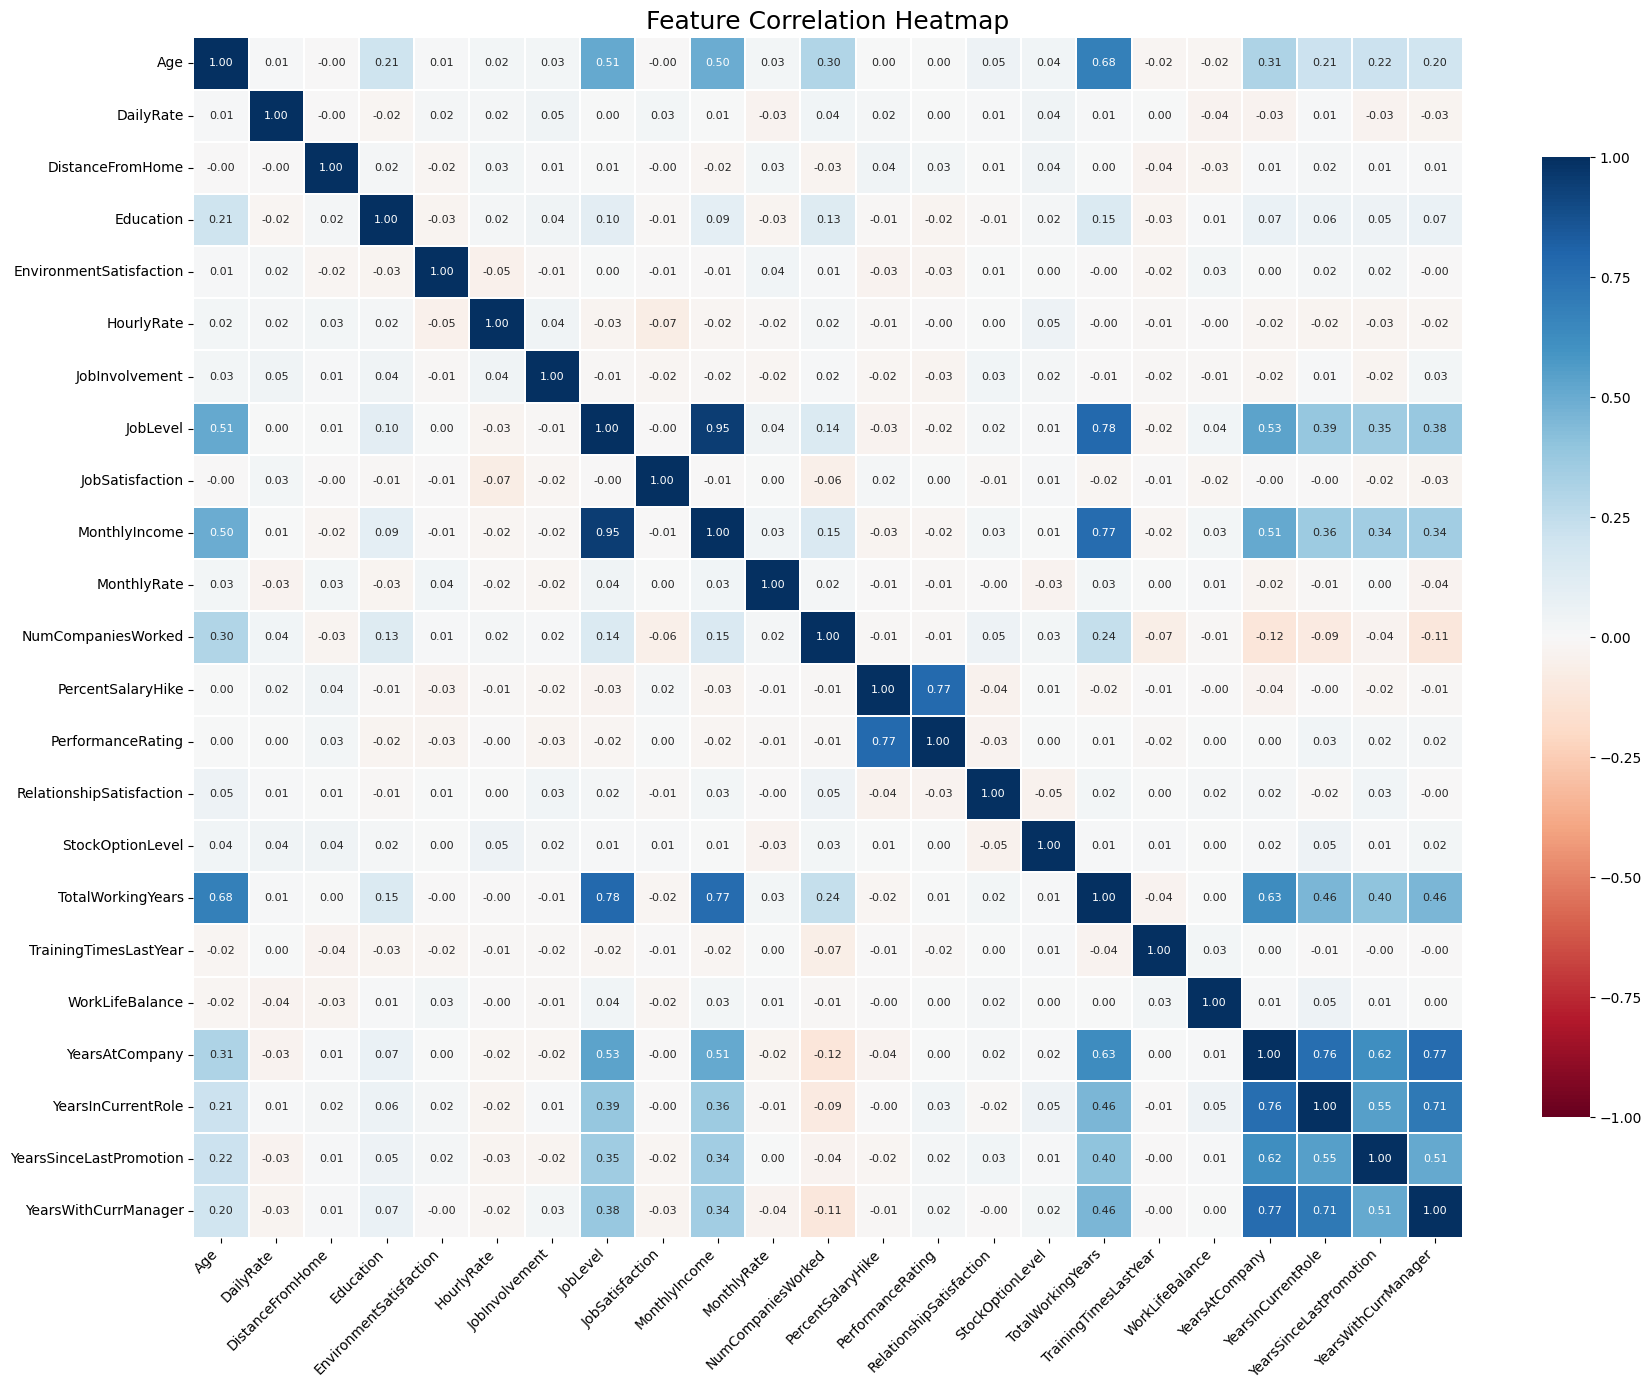

In [23]:
corr_matrix = numerical_column.corr()
plt.figure(figsize=(18, 14))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.3,
    annot_kws={"size": 8},   # smaller text
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()



Higher job levels naturally have higher income, Employees staying longer often have the same manager, Role stability increases with tenure
Weak or No Correlation- 
DailyRate
HourlyRate
DistanceFromHome
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance

Salary, experience, and tenure variables are highly interconnected


In [ ]:
weak_num_cols = ["DailyRate","HourlyRate","MonthlyRate","DistanceFromHome", "TrainingTimesLastYear", "StockOptionLevel", "WorkLifeBalance"]
emp_data = emp_data.drop(columns=weak_num_cols)

In [25]:
numeric_column = emp_data.select_dtypes(include='number')

In [26]:
outlier_check = {}

for col in numeric_column:
    Q1 = emp_data[col].quantile(0.25)
    Q3 = emp_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = ((emp_data[col] < lower) | (emp_data[col] > upper)).sum()
    outlier_check[col] = count

outlier = pd.DataFrame.from_dict(
    outlier_check, orient='index', columns=['Outlier_Count']
)

outlier

,Outlier_Count
Age,0
DailyRate,0
DistanceFromHome,0
EnvironmentSatisfaction,0
JobInvolvement,0
JobLevel,0
JobSatisfaction,0
MonthlyIncome,114
StockOptionLevel,85
TotalWorkingYears,63


In [27]:
column_with_outliers = ['MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
    'YearsInCurrentRole', 'YearsWithCurrManager']

In [28]:
for col in column_with_outliers: #capping
    Q1 = emp_data[col].quantile(0.25)
    Q3 = emp_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    emp_data[col] = emp_data[col].clip(lower, upper)

In [29]:
outlier_check = {}

for col in numeric_column:
    Q1 = emp_data[col].quantile(0.25)
    Q3 = emp_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = ((emp_data[col] < lower) | (emp_data[col] > upper)).sum()
    outlier_check[col] = count

outlier = pd.DataFrame.from_dict(
    outlier_check, orient='index', columns=['Outlier_Count']
)

outlier

,Outlier_Count
Age,0
DailyRate,0
DistanceFromHome,0
EnvironmentSatisfaction,0
JobInvolvement,0
JobLevel,0
JobSatisfaction,0
MonthlyIncome,0
StockOptionLevel,0
TotalWorkingYears,0


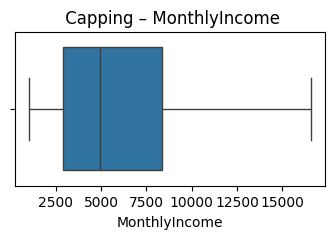

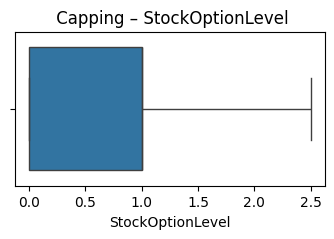

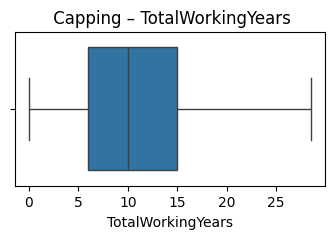

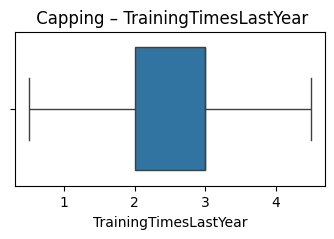

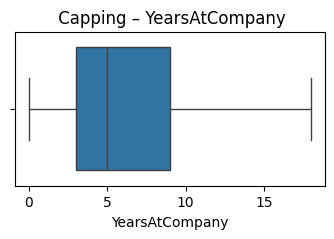

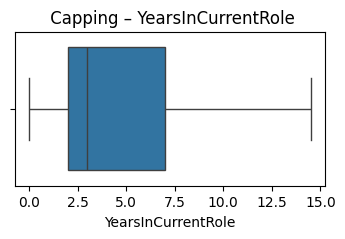

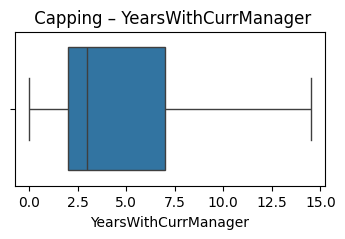

In [30]:
for col in column_with_outliers:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=emp_data[col])
    plt.title(f' Capping – {col}')
    plt.show()

In [31]:
# converting categorical data to numeric data
emp_data['Attrition'] = emp_data['Attrition'].map({'Yes': 1, 'No': 0})
emp_data['OverTime'] = emp_data['OverTime'].map({'Yes': 1, 'No': 0})

In [32]:
cat_cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [33]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = encoder.fit_transform(emp_data[cat_cols])

encoded_emp_data = pd.DataFrame(
    encoded_cols,
    columns=encoder.get_feature_names_out(cat_cols)
)

emp_data_final = pd.concat(
    [
        emp_data.drop(columns=cat_cols).reset_index(drop=True),
        encoded_emp_data.reset_index(drop=True)
    ],
    axis=1
)

emp_data_final.head()


,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_1
0,41,1,1102,1,2,3,2,4,5993,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0,279,8,3,2,2,2,5130,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1,1373,2,4,2,1,3,2090,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0,1392,3,4,3,1,3,2909,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0,591,2,1,3,1,2,3468,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
emp_data_final.to_csv("emp_data_final.csv", index=False)

In [34]:
X = emp_data_final.drop('Attrition', axis=1)
y = emp_data_final['Attrition']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_no_lr = lr.predict(X_test_scaled)
y_prob_no_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [37]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_no_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_no_lr))
print(confusion_matrix(y_test, y_pred_no_lr))
print(classification_report(y_test, y_pred_no_lr))

Logistic Regression Accuracy: 0.8586956521739131
ROC-AUC: 0.7851461795842247
[[299  10]
 [ 42  17]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.63      0.29      0.40        59

    accuracy                           0.86       368
   macro avg       0.75      0.63      0.66       368
weighted avg       0.84      0.86      0.84       368



In [38]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_no_rf = rf.predict(X_test)
y_prob_no_rf = rf.predict_proba(X_test)[:, 1]


In [39]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_no_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_no_rf))
print(confusion_matrix(y_test, y_pred_no_rf))
print(classification_report(y_test, y_pred_no_rf))

Random Forest Accuracy: 0.842391304347826
ROC-AUC: 0.7593659151993857
[[302   7]
 [ 51   8]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       309
           1       0.53      0.14      0.22        59

    accuracy                           0.84       368
   macro avg       0.69      0.56      0.56       368
weighted avg       0.80      0.84      0.80       368



In [40]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_no_xgb = xgb.predict(X_test)
y_prob_no_xgb = xgb.predict_proba(X_test)[:, 1]

In [41]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_no_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_no_xgb))
print(confusion_matrix(y_test, y_pred_no_xgb))
print(classification_report(y_test, y_pred_no_xgb))

XGBoost Accuracy: 0.8532608695652174
ROC-AUC: 0.8107070374636609
[[299  10]
 [ 44  15]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       309
           1       0.60      0.25      0.36        59

    accuracy                           0.85       368
   macro avg       0.74      0.61      0.64       368
weighted avg       0.83      0.85      0.83       368



In [42]:
# model_comparison of Logistic Regression, Random Forest, XGBoost
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_no_lr),
        accuracy_score(y_test, y_pred_no_rf),
        accuracy_score(y_test, y_pred_no_xgb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_no_lr),
        roc_auc_score(y_test, y_prob_no_rf),
        roc_auc_score(y_test, y_prob_no_xgb)
    ]
})

model_comparison


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.858696,0.785146
1,Random Forest,0.842391,0.759366
2,XGBoost,0.853261,0.810707


In [43]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Attrition
0    1233
1     237
Name: count, dtype: int64
Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [44]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
Attrition
0    924
1    178
Name: count, dtype: int64

After SMOTE:
Attrition
0    924
1    924
Name: count, dtype: int64


In [81]:
# Logistic Regression with SMOTE
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


# Create pipeline
lr_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(max_iter=1000))
])

# Fit pipeline on SMOTE data
lr_pipeline.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]



In [82]:
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


[[266  43]
 [ 25  34]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       309
           1       0.44      0.58      0.50        59

    accuracy                           0.82       368
   macro avg       0.68      0.72      0.69       368
weighted avg       0.84      0.82      0.82       368

ROC-AUC: 0.7708299051066865


In [83]:
# Logistic Regression before and after SMOTE
comparison_lr = pd.DataFrame({
    'Model': ['Logistic Regression (No SMOTE)', 'Logistic Regression (SMOTE)'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_no_lr),
        accuracy_score(y_test, y_pred_lr)
    ],
    'Recall (Attrition=Yes)': [
        classification_report(y_test, y_pred_no_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall']
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_no_lr),
        roc_auc_score(y_test, y_prob_lr)
    ]
})

comparison_lr


,Model,Accuracy,Recall (Attrition=Yes),ROC-AUC
0,Logistic Regression (No SMOTE),0.858696,0.288136,0.785146
1,Logistic Regression (SMOTE),0.815217,0.576271,0.770830


In [84]:
# classification reports as dictionaries for Logistic Regression before and after SMOTE
report_no = classification_report(y_test, y_pred_no_lr, output_dict=True)
report_sm = classification_report(y_test, y_pred_lr, output_dict=True)

# Build comparison dataframe
comparison_lr_full = pd.DataFrame({
    'Metric': ['Precision (No Attrition)', 'Recall (No Attrition)', 'F1-score (No Attrition)', 'Support (No Attrition)',
               'Precision (Attrition)', 'Recall (Attrition)', 'F1-score (Attrition)', 'Support (Attrition)',
               'Accuracy', 'ROC-AUC'],
    'Logistic Regression (No SMOTE)': [
        report_no['0']['precision'],
        report_no['0']['recall'],
        report_no['0']['f1-score'],
        report_no['0']['support'],
        report_no['1']['precision'],
        report_no['1']['recall'],
        report_no['1']['f1-score'],
        report_no['1']['support'],
        report_no['accuracy'],
        roc_auc_score(y_test, y_prob_no_lr)
    ],
    'Logistic Regression (SMOTE)': [
        report_sm['0']['precision'],
        report_sm['0']['recall'],
        report_sm['0']['f1-score'],
        report_sm['0']['support'],
        report_sm['1']['precision'],
        report_sm['1']['recall'],
        report_sm['1']['f1-score'],
        report_sm['1']['support'],
        report_sm['accuracy'],
        roc_auc_score(y_test, y_prob_smlr)
    ]
})

comparison_lr_full


,Metric,Logistic Regression (No SMOTE),Logistic Regression (SMOTE)
0,Precision (No Attrition),0.876833,0.914089
1,Recall (No Attrition),0.967638,0.860841
2,F1-score (No Attrition),0.920000,0.886667
3,Support (No Attrition),309.000000,309.000000
4,Precision (Attrition),0.629630,0.441558
5,Recall (Attrition),0.288136,0.576271
6,F1-score (Attrition),0.395349,0.500000
7,Support (Attrition),59.000000,59.000000
8,Accuracy,0.858696,0.815217
9,ROC-AUC,0.785146,0.770830


In [49]:
# RandomForestClassifier after SMOTE
rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=9,
    class_weight='balanced',
    random_state=7
)

rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smrf = rf_smote.predict(X_test)
y_prob_smrf = rf_smote.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_smrf))
print(classification_report(y_test, y_pred_smrf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_smrf))

[[302   7]
 [ 45  14]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       309
           1       0.67      0.24      0.35        59

    accuracy                           0.86       368
   macro avg       0.77      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368

ROC-AUC: 0.7881630190335142


In [50]:
# Classification reports as dictionaries
report_rf_no = classification_report(y_test, y_pred_no_rf, output_dict=True)
report_rf_sm = classification_report(y_test, y_pred_smrf, output_dict=True)

comparison_rf_full = pd.DataFrame({
    'Metric': ['Precision (No Attrition)', 'Recall (No Attrition)', 'F1-score (No Attrition)', 'Support (No Attrition)',
               'Precision (Attrition)', 'Recall (Attrition)', 'F1-score (Attrition)', 'Support (Attrition)',
               'Accuracy', 'ROC-AUC'],
    'Random Forest (No SMOTE)': [
        report_rf_no['0']['precision'],
        report_rf_no['0']['recall'],
        report_rf_no['0']['f1-score'],
        report_rf_no['0']['support'],
        report_rf_no['1']['precision'],
        report_rf_no['1']['recall'],
        report_rf_no['1']['f1-score'],
        report_rf_no['1']['support'],
        report_rf_no['accuracy'],
        roc_auc_score(y_test, y_prob_no_rf)
    ],
    'Random Forest (SMOTE)': [
        report_rf_sm['0']['precision'],
        report_rf_sm['0']['recall'],
        report_rf_sm['0']['f1-score'],
        report_rf_sm['0']['support'],
        report_rf_sm['1']['precision'],
        report_rf_sm['1']['recall'],
        report_rf_sm['1']['f1-score'],
        report_rf_sm['1']['support'],
        report_rf_sm['accuracy'],
        roc_auc_score(y_test, y_prob_smrf)
    ]
})

comparison_rf_full


,Metric,Random Forest (No SMOTE),Random Forest (SMOTE)
0,Precision (No Attrition),0.855524,0.870317
1,Recall (No Attrition),0.977346,0.977346
2,F1-score (No Attrition),0.912387,0.920732
3,Support (No Attrition),309.000000,309.000000
4,Precision (Attrition),0.533333,0.666667
5,Recall (Attrition),0.135593,0.237288
6,F1-score (Attrition),0.216216,0.350000
7,Support (Attrition),59.000000,59.000000
8,Accuracy,0.842391,0.858696
9,ROC-AUC,0.759366,0.788163


In [51]:
# XGBClassifier after SMOTE

xgb_smote = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_smxgb = xgb_smote.predict(X_test)
y_prob_smxgb = xgb_smote.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_smxgb))
print(classification_report(y_test, y_pred_smxgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_smxgb))


[[299  10]
 [ 43  16]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       309
           1       0.62      0.27      0.38        59

    accuracy                           0.86       368
   macro avg       0.74      0.62      0.65       368
weighted avg       0.83      0.86      0.83       368

ROC-AUC: 0.8224452855027151


In [52]:

# Classification reports as dictionaries for XGBoost before and after SMOTE
report_xgb_no = classification_report(y_test, y_pred_no_xgb, output_dict=True)
report_xgb_sm = classification_report(y_test, y_pred_smxgb, output_dict=True)
comparison_xgb_full = pd.DataFrame({
    'Metric': ['Precision (No Attrition)', 'Recall (No Attrition)', 'F1-score (No Attrition)', 'Support (No Attrition)',
               'Precision (Attrition)', 'Recall (Attrition)', 'F1-score (Attrition)', 'Support (Attrition)',
               'Accuracy', 'ROC-AUC'],
    'XGBoost (No SMOTE)': [
        report_xgb_no['0']['precision'],
        report_xgb_no['0']['recall'],
        report_xgb_no['0']['f1-score'],
        report_xgb_no['0']['support'],
        report_xgb_no['1']['precision'],
        report_xgb_no['1']['recall'],
        report_xgb_no['1']['f1-score'],
        report_xgb_no['1']['support'],
        report_xgb_no['accuracy'],
        roc_auc_score(y_test, y_prob_no_xgb)
    ],
    'XGBoost (SMOTE)': [
        report_xgb_sm['0']['precision'],
        report_xgb_sm['0']['recall'],
        report_xgb_sm['0']['f1-score'],
        report_xgb_sm['0']['support'],
        report_xgb_sm['1']['precision'],
        report_xgb_sm['1']['recall'],
        report_xgb_sm['1']['f1-score'],
        report_xgb_sm['1']['support'],
        report_xgb_sm['accuracy'],
        roc_auc_score(y_test, y_prob_smxgb)
    ]
})

comparison_xgb_full



,Metric,XGBoost (No SMOTE),XGBoost (SMOTE)
0,Precision (No Attrition),0.871720,0.874269
1,Recall (No Attrition),0.967638,0.967638
2,F1-score (No Attrition),0.917178,0.918587
3,Support (No Attrition),309.000000,309.000000
4,Precision (Attrition),0.600000,0.615385
5,Recall (Attrition),0.254237,0.271186
6,F1-score (Attrition),0.357143,0.376471
7,Support (Attrition),59.000000,59.000000
8,Accuracy,0.853261,0.855978
9,ROC-AUC,0.810707,0.822445


In [85]:
# Logistic Regression after SMOTE
y_pred_lr, y_prob_lr

# Random Forest after SMOTE
y_pred_smrf, y_prob_smrf

# XGBoost after SMOTE
y_pred_smxgb, y_prob_smxgb

def get_metrics(y_true, y_pred, y_prob):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = {
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Support_0': report['0']['support'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Support_1': report['1']['support'],
        'Accuracy': report['accuracy'],
        'ROC-AUC': roc_auc_score(y_true, y_prob)
    }
    return metrics
comparison_after_smote = pd.DataFrame([
    {'Model': 'Logistic Regression', **get_metrics(y_test, y_pred_smlr, y_prob_smlr)},
    {'Model': 'Random Forest', **get_metrics(y_test, y_pred_smrf, y_prob_smrf)},
    {'Model': 'XGBoost', **get_metrics(y_test, y_pred_smxgb, y_prob_smxgb)}
])

comparison_after_smote



,Model,Precision_0,Recall_0,F1_0,Support_0,Precision_1,Recall_1,F1_1,Support_1,Accuracy,ROC-AUC
0,Logistic Regression,0.914089,0.860841,0.886667,309.0,0.441558,0.576271,0.500000,59.0,0.815217,0.770830
1,Random Forest,0.870317,0.977346,0.920732,309.0,0.666667,0.237288,0.350000,59.0,0.858696,0.788163
2,XGBoost,0.874269,0.967638,0.918587,309.0,0.615385,0.271186,0.376471,59.0,0.855978,0.822445


In [86]:
# Metrics for Attrition class
metrics_attrition = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Precision': [0.388889, 0.6, 0.6],
    'Recall': [0.593220, 0.254237, 0.305085],
    'F1-score': [0.469799, 0.357143, 0.404494]
})

# Melt dataframe for Seaborn
metrics_melted = metrics_attrition.melt(id_vars='Model', var_name='Metric', value_name='Score')


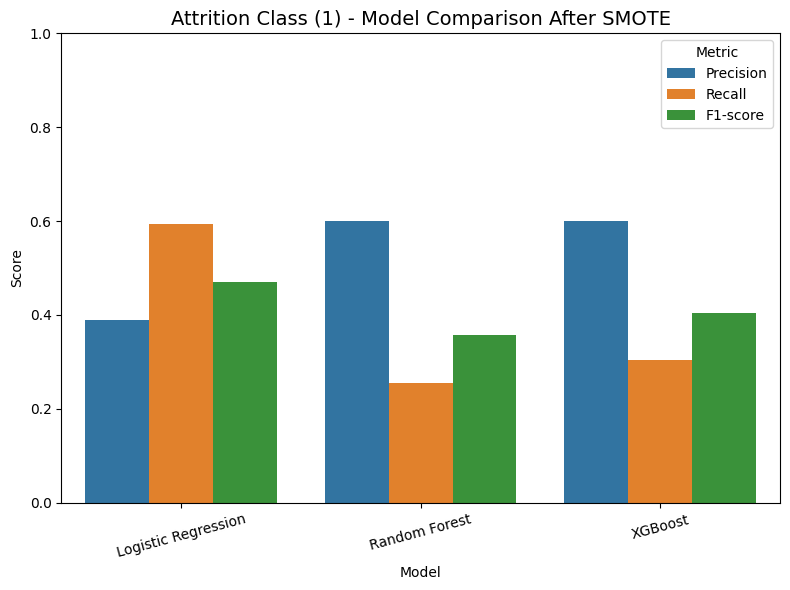

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric')
plt.title("Attrition Class (1) - Model Comparison After SMOTE", fontsize=14)
plt.ylim(0,1)
plt.ylabel("Score")
plt.legend(title='Metric')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



In [56]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring=f1_scorer,    # maximize F1 for minority class
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # use all cores
    verbose=2
)
grid_gb.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,"make_scorer(f..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [57]:
print("Best parameters:", grid_gb.best_params_)
print("Best F1-score (class 1):", grid_gb.best_score_)
best_gb = grid_gb.best_estimator_

y_pred_gb = best_gb.predict(X_test)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))


Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1-score (class 1): 0.8633988738793734
[[299  10]
 [ 37  22]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.69      0.37      0.48        59

    accuracy                           0.87       368
   macro avg       0.79      0.67      0.71       368
weighted avg       0.86      0.87      0.86       368

ROC-AUC: 0.768745543305359


In [91]:
feature_importance = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': best_gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Show top 10 features
print(feature_importance.head(10))

                              Feature  Importance
35                         OverTime_1    0.335040
34               MaritalStatus_Single    0.115251
8                    StockOptionLevel    0.075218
7                       MonthlyIncome    0.073562
15   BusinessTravel_Travel_Frequently    0.068480
17  Department_Research & Development    0.044439
6                     JobSatisfaction    0.031549
3             EnvironmentSatisfaction    0.023931
0                                 Age    0.023638
9                   TotalWorkingYears    0.023498


In [92]:
feature_importance.to_csv("gb_feature_importance.csv", index=False)
joblib.dump(feature_importance, "gb_feature_importance.pkl")

['gb_feature_importance.pkl']

In [75]:
joblib.dump(best_gb, "gradient_boosting_best.pkl") 

['gradient_boosting_best.pkl']

In [90]:
feature_columns = emp_data_final.drop("Attrition", axis=1).columns.tolist()
joblib.dump(feature_columns, "gb_features.pkl")

['gb_features.pkl']

In [76]:
joblib.dump(best_threshold, "gb_threshold.pkl") 

['gb_threshold.pkl']

In [88]:
joblib.dump(lr_pipeline, "lr_smote_pipeline.pkl")

['lr_smote_pipeline.pkl']